In [1]:
import os
import sys
import networkx as nx
import numpy as np
from epynet import Network

sys.path.insert(0, os.path.join('..'))
from utils.graph_utils import get_nx_graph, get_sensitivity_matrix
from utils.SensorInstaller import SensorInstaller
from utils.DataReader import DataReader

In [2]:
wds_id = 'anytown'

In [3]:
path_to_data = os.path.join('..', 'data', 'db_'+wds_id+'_doe_pumpfed_1')
path_to_wds = os.path.join('..', 'water_networks', wds_id+'.inp')

### Loading WDS topology

In [4]:
wds = Network(path_to_wds)
G = get_nx_graph(wds, mode='weighted')
installer = SensorInstaller(wds)

In [5]:
coords = {}
for node in wds.nodes:
    arr = [node.coordinates[0], node.coordinates[1]]
    coords[int(node.index)] = arr

In [6]:
node_colors = ['#ffffff' for _ in G.nodes]
# nx.draw(G, pos=coords, with_labels=True, node_color=node_colors)

### Collecting master nodes

In [7]:
master_nodes = installer.master_nodes

### Calculating sensitivity matrix

In [8]:
pert = np.max(wds.junctions.basedemand)/100
S = get_sensitivity_matrix(wds, pert)

### Shortest path selection

In [9]:
sensor_budget = 3
installer.deploy_by_random(sensor_budget=sensor_budget, seed=1)
# installer.deploy_by_shortest_path(sensor_budget=sensor_budget, weight_by=None)
# installer.deploy_by_shortest_path(sensor_budget=sensor_budget, weight_by='length')
# installer.deploy_by_shortest_path(sensor_budget=sensor_budget, weight_by='iweight')
# installer.deploy_by_shortest_path_with_sensitivity(
#     sensor_budget = sensor_budget,
#     sensitivity_matrix = S,
#     weight_by = 'iweight'
# )
sensor_nodes = installer.sensor_nodes

### Sensor placement plot

In [10]:
node_arr = np.array(G.nodes)
node_colors = ['#ffffff' for _ in G.nodes]
for node in master_nodes:
    try:
        node_colors[np.where(node_arr == node)[0][0]] = '#ff0000'
    except:
        print(node)
for node in sensor_nodes:
    node_colors[np.where(node_arr == node)[0][0]] = '#008000'

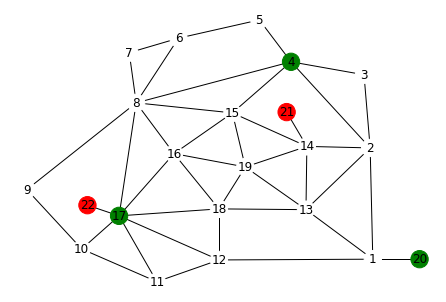

In [11]:
nx.draw(G, pos=coords, with_labels=True, node_color=node_colors, alpha=None)

### Sensitivity matrix

In [12]:
sensitive_nodes = set(np.argsort(np.sum(S, axis=0))[:sensor_budget])

In [13]:
node_arr = np.array(G.nodes)
node_colors = ['#ffffff' for _ in G.nodes]
for node in master_nodes:
    try:
        node_colors[np.where(node_arr == node)[0][0]] = '#ff0000'
    except:
        print(node)
for node in sensitive_nodes:
    node_colors[np.where(node_arr == node)[0][0]] = '#008000'

In [14]:
# nx.draw(G, pos=coords, with_labels=False, node_color=node_colors, alpha=.5)

### Interface test

In [15]:
installer.deploy_by_random(sensor_budget=sensor_budget, seed=2)
node_order = np.array(list(G.nodes))-1
reader = DataReader(path_to_data, len(wds.junctions), signal_mask=installer.signal_mask(), node_order=node_order)
dta, _, _ = reader.read_data(dataset='tst', varname='junc_heads', rescale=None, cover=True)

In [16]:
G.nodes

NodeView((1, 2, 12, 13, 20, 3, 4, 14, 8, 15, 9, 16, 17, 10, 11, 18, 19, 21, 22, 5, 6, 7))

In [17]:
installer.sensor_nodes

{1, 13, 15}

In [18]:
installer.signal_mask()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [19]:
reader.obs_ind.compute()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [20]:
node_order

array([ 0,  1, 11, 12, 19,  2,  3, 13,  7, 14,  8, 15, 16,  9, 10, 17, 18,
       20, 21,  4,  5,  6])

In [21]:
for node in installer.sensor_nodes:
    print(np.where(node_order == node-1))

(array([0]),)
(array([3]),)
(array([9]),)


In [22]:
dta[0,:,:]

array([[111.2991 ,   1.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [ 81.49394,   1.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [ 73.51562,   1.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ]], dtype=float32)